#### Library

In [1]:
import pandas as pd
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

from xgboost import XGBRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

#### Data Loading

In [2]:
df = pd.read_csv('/home/kevin/Downloads/BESS/data/data_June2024_Dec2024/merged_df_June2024_Dec2024.csv')

#### Data Processing

In [3]:
df.shape

(5139, 67)

In [4]:
df.head()

,datetime_,pool_price,forecast_pool_price,rolling_30day_avg_price,alberta_internal_load,forecast_alberta_internal_load,solar_generation,wind_generation,temp_calgary,temp_edmonton,temp_fortmc,ws_calgary,ws_edmonton,ws_fortmc,hour_of_day,day_of_week,week_of_month,month,season,pool_price_lag_1,pool_price_lag_2,pool_price_lag_3,pool_price_lag_4,pool_price_lag_5,pool_price_lag_6,pool_price_lag_7,pool_price_lag_8,pool_price_lag_9,pool_price_lag_10,pool_price_lag_11,pool_price_lag_12,pool_price_lag_13,pool_price_lag_14,pool_price_lag_15,pool_price_lag_16,pool_price_lag_17,pool_price_lag_18,pool_price_lag_19,pool_price_lag_20,pool_price_lag_21,pool_price_lag_22,pool_price_lag_23,pool_price_lag_24,alberta_internal_load_lag_1,alberta_internal_load_lag_2,alberta_internal_load_lag_3,alberta_internal_load_lag_4,alberta_internal_load_lag_5,alberta_internal_load_lag_6,alberta_internal_load_lag_7,alberta_internal_load_lag_8,alberta_internal_load_lag_9,alberta_internal_load_lag_10,alberta_internal_load_lag_11,alberta_internal_load_lag_12,alberta_internal_load_lag_13,alberta_internal_load_lag_14,alberta_internal_load_lag_15,alberta_internal_load_lag_16,alberta_internal_load_lag_17,alberta_internal_load_lag_18,alberta_internal_load_lag_19,alberta_internal_load_lag_20,alberta_internal_load_lag_21,alberta_internal_load_lag_22,alberta_internal_load_lag_23,alberta_internal_load_lag_24
0,2024-06-01 00:00:00,30.83,24.30,35.38,8703,8662,0.0,1017.402785,9.9,4.1,5.9,6.0,11.0,14.0,0,5,22,6,summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-01 01:00:00,20.23,23.25,35.36,8724,8625,0.0,1294.319027,6.5,5.1,5.4,10.0,14.0,20.0,1,5,22,6,summer,30.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-01 02:00:00,13.56,18.02,35.34,8657,8649,0.0,1678.965264,5.9,5.7,5.1,13.0,16.0,19.0,2,5,22,6,summer,20.23,30.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8724.0,8703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-01 03:00:00,10.53,11.00,35.32,8634,8632,0.0,1959.930783,3.4,5.6,5.4,7.0,18.0,24.0,3,5,22,6,summer,13.56,20.23,30.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8657.0,8724.0,8703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-01 04:00:00,12.43,10.09,35.31,8606,8632,0.0,1713.419408,4.2,4.7,4.0,3.0,14.0,12.0,4,5,22,6,summer,10.53,13.56,20.23,30.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8634.0,8657.0,8724.0,8703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

datetime_                          0
pool_price                         0
forecast_pool_price                0
rolling_30day_avg_price            0
alberta_internal_load              0
forecast_alberta_internal_load     0
solar_generation                  24
wind_generation                   24
temp_calgary                       7
temp_edmonton                     13
temp_fortmc                        8
ws_calgary                         8
ws_edmonton                       13
ws_fortmc                          8
hour_of_day                        0
day_of_week                        0
week_of_month                      0
month                              0
season                             0
pool_price_lag_1                   1
pool_price_lag_2                   2
pool_price_lag_3                   3
pool_price_lag_4                   4
pool_price_lag_5                   5
pool_price_lag_6                   6
pool_price_lag_7                   7
pool_price_lag_8                   8
p

In [6]:
df['solar_generation'].fillna(df.solar_generation.median(), inplace=True)
df['wind_generation'].fillna(df.wind_generation.median(), inplace=True)

df['temp_calgary'].fillna(df.temp_calgary.median(), inplace=True)
df['temp_edmonton'].fillna(df.temp_edmonton.median(), inplace=True)
df['temp_fortmc'].fillna(df.temp_fortmc.median(), inplace=True)

df['ws_calgary'].fillna(df.ws_calgary.median(), inplace=True)
df['ws_edmonton'].fillna(df.ws_edmonton.median(), inplace=True)
df['ws_fortmc'].fillna(df.ws_fortmc.median(), inplace=True)

/tmp/ipykernel_48680/3182295738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['solar_generation'].fillna(df.solar_generation.median(), inplace=True)
/tmp/ipykernel_48680/3182295738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [7]:
df.isnull().sum()

datetime_                          0
pool_price                         0
forecast_pool_price                0
rolling_30day_avg_price            0
alberta_internal_load              0
forecast_alberta_internal_load     0
solar_generation                   0
wind_generation                    0
temp_calgary                       0
temp_edmonton                      0
temp_fortmc                        0
ws_calgary                         0
ws_edmonton                        0
ws_fortmc                          0
hour_of_day                        0
day_of_week                        0
week_of_month                      0
month                              0
season                             0
pool_price_lag_1                   1
pool_price_lag_2                   2
pool_price_lag_3                   3
pool_price_lag_4                   4
pool_price_lag_5                   5
pool_price_lag_6                   6
pool_price_lag_7                   7
pool_price_lag_8                   8
p

In [8]:
# fill NAN with bfill method
lagged_columns = [f'pool_price_lag_{i}' for i in range(1, 25)] + [f'alberta_internal_load_lag_{i}' for i in range(1, 25)]

df[lagged_columns] = df[lagged_columns].fillna(method='bfill')
# Verify if NaN values are filled
print(df[lagged_columns].isnull().sum())

pool_price_lag_1                0
pool_price_lag_2                0
pool_price_lag_3                0
pool_price_lag_4                0
pool_price_lag_5                0
pool_price_lag_6                0
pool_price_lag_7                0
pool_price_lag_8                0
pool_price_lag_9                0
pool_price_lag_10               0
pool_price_lag_11               0
pool_price_lag_12               0
pool_price_lag_13               0
pool_price_lag_14               0
pool_price_lag_15               0
pool_price_lag_16               0
pool_price_lag_17               0
pool_price_lag_18               0
pool_price_lag_19               0
pool_price_lag_20               0
pool_price_lag_21               0
pool_price_lag_22               0
pool_price_lag_23               0
pool_price_lag_24               0
alberta_internal_load_lag_1     0
alberta_internal_load_lag_2     0
alberta_internal_load_lag_3     0
alberta_internal_load_lag_4     0
alberta_internal_load_lag_5     0
alberta_intern

/tmp/ipykernel_48680/3663279716.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[lagged_columns] = df[lagged_columns].fillna(method='bfill')


In [9]:
# we have 7 months of data

# use 6 months of data to train ML model
    # independent variable: solar_generation, wind_generation, temp_calgary, temp_edmonton, temp_fortmc
    # target variable: pool_price

# use 1 month of data to test ML model

In [10]:
df.head()

,datetime_,pool_price,forecast_pool_price,rolling_30day_avg_price,alberta_internal_load,forecast_alberta_internal_load,solar_generation,wind_generation,temp_calgary,temp_edmonton,temp_fortmc,ws_calgary,ws_edmonton,ws_fortmc,hour_of_day,day_of_week,week_of_month,month,season,pool_price_lag_1,pool_price_lag_2,pool_price_lag_3,pool_price_lag_4,pool_price_lag_5,pool_price_lag_6,pool_price_lag_7,pool_price_lag_8,pool_price_lag_9,pool_price_lag_10,pool_price_lag_11,pool_price_lag_12,pool_price_lag_13,pool_price_lag_14,pool_price_lag_15,pool_price_lag_16,pool_price_lag_17,pool_price_lag_18,pool_price_lag_19,pool_price_lag_20,pool_price_lag_21,pool_price_lag_22,pool_price_lag_23,pool_price_lag_24,alberta_internal_load_lag_1,alberta_internal_load_lag_2,alberta_internal_load_lag_3,alberta_internal_load_lag_4,alberta_internal_load_lag_5,alberta_internal_load_lag_6,alberta_internal_load_lag_7,alberta_internal_load_lag_8,alberta_internal_load_lag_9,alberta_internal_load_lag_10,alberta_internal_load_lag_11,alberta_internal_load_lag_12,alberta_internal_load_lag_13,alberta_internal_load_lag_14,alberta_internal_load_lag_15,alberta_internal_load_lag_16,alberta_internal_load_lag_17,alberta_internal_load_lag_18,alberta_internal_load_lag_19,alberta_internal_load_lag_20,alberta_internal_load_lag_21,alberta_internal_load_lag_22,alberta_internal_load_lag_23,alberta_internal_load_lag_24
0,2024-06-01 00:00:00,30.83,24.30,35.38,8703,8662,0.0,1017.402785,9.9,4.1,5.9,6.0,11.0,14.0,0,5,22,6,summer,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
1,2024-06-01 01:00:00,20.23,23.25,35.36,8724,8625,0.0,1294.319027,6.5,5.1,5.4,10.0,14.0,20.0,1,5,22,6,summer,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
2,2024-06-01 02:00:00,13.56,18.02,35.34,8657,8649,0.0,1678.965264,5.9,5.7,5.1,13.0,16.0,19.0,2,5,22,6,summer,20.23,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8724.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
3,2024-06-01 03:00:00,10.53,11.00,35.32,8634,8632,0.0,1959.930783,3.4,5.6,5.4,7.0,18.0,24.0,3,5,22,6,summer,13.56,20.23,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8657.0,8724.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
4,2024-06-01 04:00:00,12.43,10.09,35.31,8606,8632,0.0,1713.419408,4.2,4.7,4.0,3.0,14.0,12.0,4,5,22,6,summer,10.53,13.56,20.23,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8634.0,8657.0,8724.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0


#### Train-Test split

In [18]:
# Convert datetime_ column to datetime type
df['datetime_'] = pd.to_datetime(df['datetime_'])

# Filter data for the first 6 months
train_data = df[df['datetime_'] < '2024-12-01']
test_data = df[df['datetime_'] >= '2024-12-01']

# Define independent variables (features) and target variable
# X_train = train_data[['solar_generation', 'wind_generation', 'temp_calgary', 'temp_edmonton', 'temp_fortmc']]
X_train = train_data.drop(columns=['datetime_', 'pool_price'])
y_train = train_data['pool_price']

# Display the shapes of the training data
print(X_train.shape, y_train.shape)


# Filter data for the first 6 months
test_data = df[df['datetime_'] >= '2024-12-01']

# Define independent variables (features) and target variable
X_test = test_data.drop(columns=['datetime_', 'pool_price'])
y_test = test_data['pool_price']

# Display the shapes of the training data
print(X_test.shape, y_test.shape)

(4395, 65) (4395,)
(744, 65) (744,)


#### Model Training

In [15]:
X_train.head()

,forecast_pool_price,rolling_30day_avg_price,alberta_internal_load,forecast_alberta_internal_load,solar_generation,wind_generation,temp_calgary,temp_edmonton,temp_fortmc,ws_calgary,ws_edmonton,ws_fortmc,hour_of_day,day_of_week,week_of_month,month,season,pool_price_lag_1,pool_price_lag_2,pool_price_lag_3,pool_price_lag_4,pool_price_lag_5,pool_price_lag_6,pool_price_lag_7,pool_price_lag_8,pool_price_lag_9,pool_price_lag_10,pool_price_lag_11,pool_price_lag_12,pool_price_lag_13,pool_price_lag_14,pool_price_lag_15,pool_price_lag_16,pool_price_lag_17,pool_price_lag_18,pool_price_lag_19,pool_price_lag_20,pool_price_lag_21,pool_price_lag_22,pool_price_lag_23,pool_price_lag_24,alberta_internal_load_lag_1,alberta_internal_load_lag_2,alberta_internal_load_lag_3,alberta_internal_load_lag_4,alberta_internal_load_lag_5,alberta_internal_load_lag_6,alberta_internal_load_lag_7,alberta_internal_load_lag_8,alberta_internal_load_lag_9,alberta_internal_load_lag_10,alberta_internal_load_lag_11,alberta_internal_load_lag_12,alberta_internal_load_lag_13,alberta_internal_load_lag_14,alberta_internal_load_lag_15,alberta_internal_load_lag_16,alberta_internal_load_lag_17,alberta_internal_load_lag_18,alberta_internal_load_lag_19,alberta_internal_load_lag_20,alberta_internal_load_lag_21,alberta_internal_load_lag_22,alberta_internal_load_lag_23,alberta_internal_load_lag_24
0,24.30,35.38,8703,8662,0.0,1017.402785,9.9,4.1,5.9,6.0,11.0,14.0,0,5,22,6,summer,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
1,23.25,35.36,8724,8625,0.0,1294.319027,6.5,5.1,5.4,10.0,14.0,20.0,1,5,22,6,summer,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
2,18.02,35.34,8657,8649,0.0,1678.965264,5.9,5.7,5.1,13.0,16.0,19.0,2,5,22,6,summer,20.23,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8724.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
3,11.00,35.32,8634,8632,0.0,1959.930783,3.4,5.6,5.4,7.0,18.0,24.0,3,5,22,6,summer,13.56,20.23,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8657.0,8724.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0
4,10.09,35.31,8606,8632,0.0,1713.419408,4.2,4.7,4.0,3.0,14.0,12.0,4,5,22,6,summer,10.53,13.56,20.23,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,30.83,8634.0,8657.0,8724.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0,8703.0


In [17]:
# Initialize the CatBoost regressor
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')

# Specify the categorical features
categorical_features = ['season'] 

# Train the model
catboost_regressor.fit(X_train, y_train, cat_features=categorical_features, verbose=100)

# Display the model
print(catboost_regressor)

0:	learn: 109.4309383	total: 63.5ms	remaining: 1m 3s
100:	learn: 26.7358626	total: 1.31s	remaining: 11.7s
200:	learn: 20.0347022	total: 2.57s	remaining: 10.2s
300:	learn: 15.5767153	total: 3.99s	remaining: 9.26s
400:	learn: 12.1530749	total: 5.5s	remaining: 8.22s
500:	learn: 9.8119394	total: 6.75s	remaining: 6.72s
600:	learn: 7.9962856	total: 8.4s	remaining: 5.58s
700:	learn: 6.6985464	total: 9.88s	remaining: 4.21s
800:	learn: 5.6590832	total: 11.1s	remaining: 2.76s
900:	learn: 4.8837599	total: 12.4s	remaining: 1.36s
999:	learn: 4.2683976	total: 13.8s	remaining: 0us


In [15]:
# # Initialize the XGBoost regressor
# xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, enable_categorical=True)

# # Train the model
# xgb_regressor.fit(X_train, y_train)

# # Display the model
# print(xgb_regressor)

#### Train Inference

In [19]:
# Make predictions on the training data
y_train_pred = catboost_regressor.predict(X_train)

# Display the predictions
print(y_train_pred)
# Calculate mean squared error for training data
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train Mean Squared Error: {train_mse}")

# Calculate R^2 score for training data
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {train_r2}")

[25.26044889 23.88662081 16.10061223 ... 39.43287274 36.37158747
 24.34355461]
Train Mean Squared Error: 18.219217760478106
Train R^2 Score: 0.9986912557289122


#### Test Inference

In [20]:
# Make predictions on the test data
y_pred = catboost_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 639.931929973422
R^2 Score: -0.21905147623096233


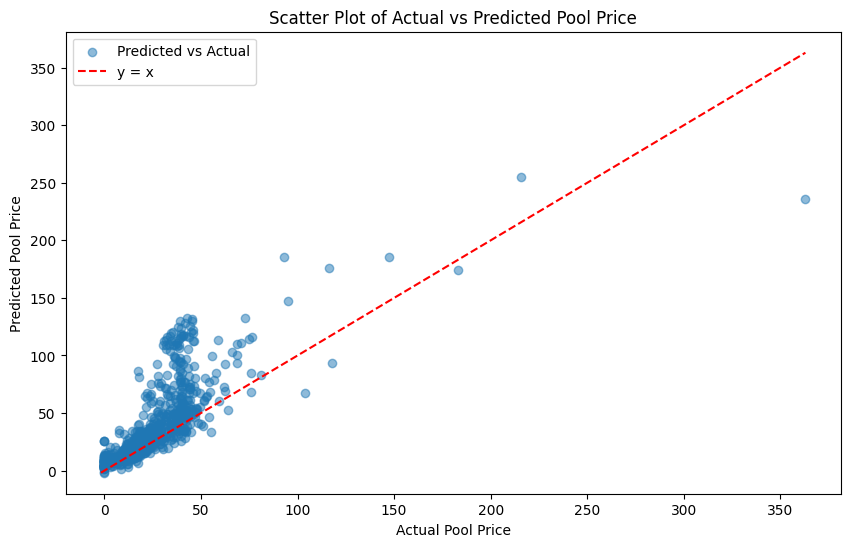

In [21]:
# Assuming y_test and y_pred are already defined
# Generate values for the y = x line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
line_values = np.linspace(min_val, max_val, 100)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

# Plot the y = x line
plt.plot(line_values, line_values, color='red', linestyle='--', label='y = x')

# Add labels and title
plt.xlabel('Actual Pool Price')
plt.ylabel('Predicted Pool Price')
plt.title('Scatter Plot of Actual vs Predicted Pool Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()